# **FILES, EXCEPTIONAL HANDLING, LOGGING AND MEMORY MANAGEMENT**

# **THEORY QUESTIONS**

Ques1. What is the difference between interpreted and compiled languages ?

The key difference between interpreted and compiled languages lies in how they process code: interpreted languages execute code line by line, while compiled languages translate the entire code into machine code before execution.

Ques2. What is exception handling in Python ?

Exception handling in Python is a mechanism to gracefully manage errors that may arise during the execution of a program. When an error, known as an exception, occurs, it can disrupt the normal flow of the program. Exception handling allows the program to detect these errors, take appropriate actions, and continue execution instead of crashing.

Ques3. What is the purpose of the finally block in exception handling ?

The purpose of the finally block in exception handling is to ensure that a specific block of code, typically resource cleanup, is always executed, regardless of whether an exception is thrown within the try block or not, or even if an exception is thrown and caught in a catch block.

Ques4. What is logging in Python ?

Logging in Python is a built-in module that provides a flexible framework for emitting log messages from Python programs. It allows developers to track events, debug issues, and monitor the health of applications by recording information about the program's execution. This information can include errors, warnings, and other events that occur during the program's runtime.

Ques5.What is the significance of the __del__ method in Python ?

The del statement in Python serves to remove references to objects. It can delete variables, items from lists and dictionaries, or even slices of lists. It's important to note that del doesn't necessarily deallocate the memory occupied by the object unless it was the last reference to that object. Python's garbage collector handles memory deallocation when an object is no longer reachable.

In [ ]:
my_list = [1, 2, 3, 4, 5]
del my_list[2]  # Removes the element at index 2 (value 3)
print(my_list)  # Output: [1, 2, 4, 5]

my_dict = {'a': 1, 'b': 2, 'c': 3}
del my_dict['b']  # Removes the key 'b' and its value
print(my_dict)  # Output: {'a': 1, 'c': 3}

x = 10
del x  # Removes the variable x
# print(x)  # This would raise a NameError since x is no longer defined

[1, 2, 4, 5]
{'a': 1, 'c': 3}


When dealing with user-defined objects, the del statement triggers the __del__ method (if defined) of the object's class before removing the reference. This allows for cleanup actions like closing files or releasing resources. However, relying on __del__ for critical cleanup is discouraged because it's not guaranteed to be called in all circumstances.

In [ ]:
class MyClass:
    def __init__(self, name):
        self.name = name
        print(f"Object {self.name} created")

    def __del__(self):
        print(f"Object {self.name} deleted")

obj1 = MyClass("A")
obj2 = obj1
del obj1
print("obj1 deleted")
del obj2
print("obj2 deleted")

Object A created
obj1 deleted
Object A deleted
obj2 deleted


Ques6. What is the difference between import and from ... import in Python ?

The import and from ... import statements in Python serve to incorporate external modules or specific objects from those modules into the current scope. However, they differ in how they make these elements accessible:

**import module**: This statement imports the entire module, making it available under the name module. To access objects within the module, one must use the dot notation, such as module.object.

In [ ]:
import math
x = math.sqrt(25)  # Accessing the sqrt function using the module name
print(x) # Output: 5.0

5.0


**from module import object(s)**: This statement imports specific objects (e.g., functions, classes, variables) directly into the current namespace. These objects can then be used without the need for dot notation.


In [ ]:
from math import sqrt, pi
x = sqrt(25)  # Accessing the sqrt function directly
print(x) # Output: 5.0
print(pi) # Output: 3.141592653589793

5.0
3.141592653589793


Ques7. How can you handle multiple exceptions in Python ?

Python offers several ways to handle multiple exceptions that might occur within a try block.

**Multiple except blocks**: This approach allows handling different exception types separately. Each except block specifies a particular exception type and the code to execute if that exception occurs.

In [ ]:
    try:
        # Code that might raise exceptions
        x = int(input("Enter a number: "))
        result = 10 / x
        print(result)
    except ZeroDivisionError:
        print("Cannot divide by zero.")
    except ValueError:
        print("Invalid input. Please enter a number.")

Enter a number: 0
Cannot divide by zero.


**Single except block with a tuple of exceptions**: This method handles multiple exception types with the same code block.

In [ ]:
    try:
        # Code that might raise exceptions
        x = int(input())
        my_list = [1, 2, 3]
        print(my_list[x])
    except (ValueError, IndexError) as e:
        print(f"An error occurred: {e}")

123
An error occurred: list index out of range


**Nested try-except blocks**: For more complex scenarios, you can nest try-except blocks. This allows handling specific exceptions within a broader exception handling context.

In [ ]:
    try:
        # Outer try block
        try:
            # Inner try block
            result = 10 / int(input("Enter a number: "))
        except ValueError:
            print("Invalid input in inner block.")
        else:
             print(result)
    except ZeroDivisionError:
        print("Cannot divide by zero in outer block.")

Enter a number: 100
0.1


**ExceptionGroup**: This feature allows raising and handling multiple exceptions simultaneously. It is particularly useful in concurrent programming.

In [ ]:
    def f():
        raise ExceptionGroup("Group1", [ValueError(1), TypeError(2)])

    try:
        f()
    except ExceptionGroup as egroup:
        for exc in egroup.exceptions:
            print(exc)

1
2


These methods provide flexibility in handling different error scenarios, making your code more robust and reliable.

Que8. What is the purpose of the with statement when handling files in Python ?

The with statement in Python provides a way to ensure that resources, such as files, are properly managed. When dealing with files, it guarantees that the file is automatically closed after the block of code within the with statement is executed, even if exceptions occur. This automatic closing prevents resource leaks and ensures data integrity.

In [ ]:
#The basic syntax for using the with statement with files is:
with open('filename.txt', 'r') as file:
    # Perform operations on the file
    content = file.read()
    # ... other operations ...
# File is automatically closed here

FileNotFoundError: [Errno 2] No such file or directory: 'filename.txt'

Ques9. What is the difference between multithreading and multiprocessing ?

Multithreading involves multiple threads executing concurrently within a single process, sharing the same memory space, while multiprocessing involves multiple processes, each with its own memory space, running potentially on different CPU cores.


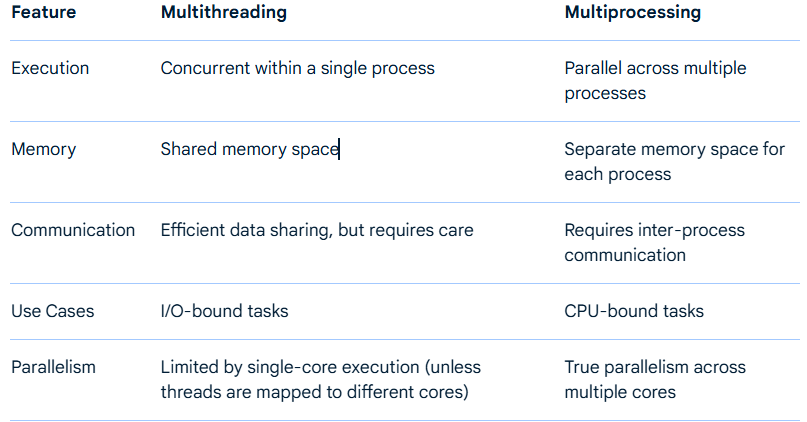

Ques10. What are the advantages of using logging in a program ?

Logging in programming offers several advantages, primarily aiding in debugging, performance analysis, and monitoring by providing a record of a program's activities, including errors, warnings, and events.

Que11. What is memory management in Python ?

Memory management in Python involves the allocation and deallocation of memory resources for objects. Python employs a private heap to store objects and data structures. The Python memory manager handles this private heap, utilizing mechanisms like reference counting and garbage collection.

Reference counting tracks the number of references to an object; when the count drops to zero, the memory is reclaimed. Garbage collection identifies and reclaims memory occupied by objects no longer in use, preventing memory leaks. Python's memory management system is designed to be automatic, simplifying development by abstracting the complexities of memory operations, allowing programmers to focus on coding rather than manual memory management.

Ques12. What are the basic steps involved in exception handling in Python ?

Exception handling in Python involves a structured approach to manage errors that may arise during the execution of a program. The basic steps are outlined below:

**Try Block**: Enclose the code that might raise an exception within a try block. This block monitors the code for potential errors.

In [ ]:
    try:
        # Code that may raise an exception
        result = 10 / 0
    except ZeroDivisionError:
        # Handle the exception
        print("Cannot divide by zero.")

Cannot divide by zero.


**Except Block**:
If an exception occurs within the try block, the program flow immediately jumps to the except block. This block specifies how to handle a particular type of exception. Multiple except blocks can be used to handle different exception types.

**Else Block (Optional)**:
An else block can be added after the except block. The code within the else block executes only if no exceptions were raised in the try block.

**Finally Block (Optional)**:
The finally block contains code that will always be executed, regardless of whether an exception was raised or not. This is often used for cleanup actions, such as closing files or releasing resources.

**Raise**:
The raise keyword is used to explicitly raise an exception. This is useful for signaling errors or exceptional conditions that the program detects.

In [ ]:
def process_data(data):
    if not isinstance(data, list):
        raise TypeError("Data must be a list")
    #rest of the code

Ques13. Why is memory management important in Python ?

Memory management is crucial in Python for several reasons:

**Efficiency**:
Efficient memory management ensures that programs utilize memory effectively, preventing wastage and optimizing performance. This leads to faster processing speeds and reduces the demand on system resources.

**Stability**:
Proper memory management helps mitigate the risk of crashes and errors caused by memory leaks or corruption. By allocating and deallocating memory appropriately, it prevents programs from exceeding their memory limits or accessing unauthorized memory regions.

**Scalability**:
Effective memory management is essential for building scalable applications that can handle large datasets and complex operations. It allows programs to manage memory dynamically, adapting to changing resource requirements and ensuring smooth operation even under heavy loads.

**Resource Optimization**:
By minimizing memory usage, efficient memory management contributes to overall resource optimization. This is particularly important in environments with limited resources, such as embedded systems or mobile devices, where memory constraints are a major concern.

**Preventing Memory Leaks**:
Python's automatic memory management, including garbage collection, helps prevent memory leaks. Memory leaks occur when programs fail to release allocated memory, leading to a gradual depletion of available resources. Proper memory management ensures that unused memory is reclaimed and made available for future use.

**Faster Processing**:
Efficient memory management leads to faster processing and less need for resources, namely random access memory (RAM) usage. More available RAM would generally mean more room for cache, which will help speed up disk access.

**Encapsulation**:
The private heap ensures that memory management is separate from the main program logic, making the programming experience simpler and cleaner.

Que14. What is the role of try and except in exception handling ?

In exception handling, the try block contains code that might raise an error, and the except block handles those errors (exceptions) gracefully, preventing the program from crashing and allowing it to continue execution.

**try block**:
This block contains the code that you want to monitor for potential errors or exceptions.
If an exception occurs within the try block, the program execution jumps to the corresponding except block.

**except block**:
This block contains the code that will be executed if an exception of the specified type occurs within the try block.
You can have multiple except blocks to handle different types of exceptions.
If no exception occurs in the try block, the except block is skipped.

In [ ]:
try:
    # Code that might raise an exception
    result = 10 / 0  # This will raise a ZeroDivisionError
except ZeroDivisionError:
    # Code to handle the exception
    print("Error: Division by zero")
except Exception as e:
    # Handle other exceptions
    print(f"An unexpected error occurred: {e}")

Error: Division by zero


Ques15. How does Python's garbage collection system work ?

Python's garbage collection system automatically manages memory by reclaiming memory occupied by objects that are no longer referenced, primarily using reference counting and a cyclic garbage collector to handle circular references.

**Reference Counting**:
Python keeps track of how many variables are pointing to each object (its reference count). When an object's reference count reaches zero, meaning no variables are pointing to it, the object is considered garbage and the memory it occupies is freed.

**Cyclic Garbage Collection**:
Reference counting alone can't handle circular references (where two or more objects reference each other, preventing their garbage collection). Python's cyclic garbage collector identifies and breaks these cycles, ensuring that memory is freed even in such cases.

**Automatic and Periodic**:
The garbage collector runs automatically and periodically, rather than requiring manual intervention from the programmer.

**Generations**:
The garbage collector uses a generational approach, dividing objects into generations based on their age (younger objects are collected more frequently). This optimizes performance by focusing on the objects that are most likely to be garbage.

**Stop-the-world**:
Python's garbage collection is "stop-the-world", meaning the program must pause while the garbage collector is running.

Ques16. What is the purpose of the else block in exception handling ?

The else block in Python's exception handling is executed only if the try block completes successfully, without raising any exceptions. It provides a way to separate the code that might raise an exception from the code that should only run if no exceptions occurred. This improves code clarity and avoids accidentally catching exceptions that were not intended to be handled by the try block.
For example:

In [ ]:
try:
    result = 10 / 2
except ZeroDivisionError:
    print("Cannot divide by zero")
else:
    print("Division successful, result:", result)

Division successful, result: 5.0


In this case, the else block will execute and print "Division successful, result: 5.0" because no exception is raised in the try block. However, if the try block were to attempt division by zero, the except block would execute instead, and the else block would be skipped.

Ques17. What are the common logging levels in Python ?

Python's logging module defines five standard logging levels, each serving a distinct purpose in tracking the severity of events within an application. These levels, in ascending order of severity, are:

**DEBUG (10)**:
This level is used for detailed information, typically valuable for diagnosing problems during development and debugging. It provides insights into the internal state and execution flow of the application.

**INFO (20)**:
The INFO level confirms that the application is functioning as expected. It logs general events that signify progress or successful operations.

**WARNING (30)**:
This level indicates that something unexpected occurred or a potential problem might arise soon. While the software is still working as expected, these messages warrant attention and investigation.

**ERROR (40)**:
The ERROR level signifies a more serious issue where the software has failed to perform a function. These logs capture exceptions and errors within the application, providing context for troubleshooting.

**CRITICAL (50)**:
This is the highest level, used for severe errors that may cause the application to terminate or become unable to continue running. It signals a critical problem requiring immediate attention.

The numeric values associated with each level are used for filtering log messages. When a logging level is set, only messages of that level or higher severity will be output. For example, setting the level to WARNING will output WARNING, ERROR, and CRITICAL messages, but not DEBUG or INFO messages.

Ques18. What is the difference between os.fork() and multiprocessing in Python ?

os.fork() and multiprocessing both facilitate the creation of processes in Python, but they operate at different levels of abstraction and have distinct characteristics:

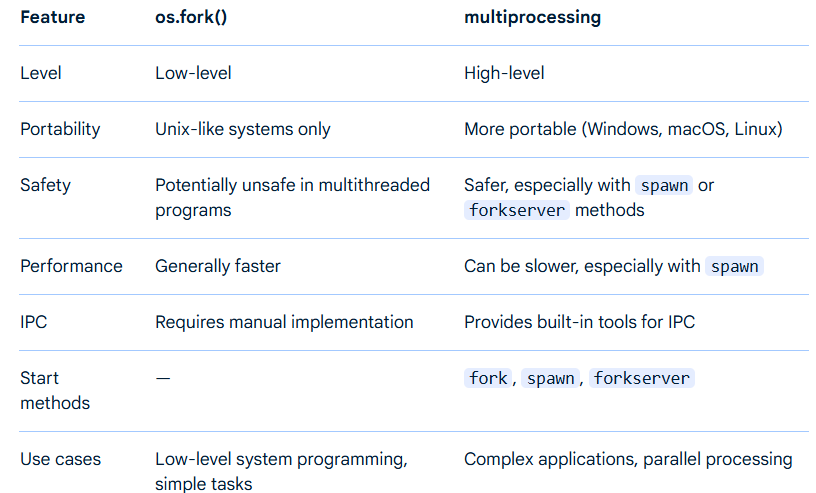

Ques19. What is the importance of closing a file in Python ?

Closing a file in Python is important for several reasons:

**Resource Management**:
When a file is opened, the operating system allocates resources to manage it. If the file is not closed properly, these resources may not be released, leading to resource leaks. Over time, this can cause performance issues or even crashes, especially if many files are opened and not closed.

**Data Integrity**:
When writing to a file, the data is often buffered in memory before being written to the disk. Closing the file ensures that all buffered data is flushed to the disk, preventing data loss or corruption. If the program terminates unexpectedly before the file is closed, the buffered data may not be written, leading to incomplete or corrupted files.

**File Locking**:
Some file systems lock files when they are opened for writing. If a file is not closed, it may remain locked, preventing other processes or users from accessing it. This can cause problems if other programs or users need to read or write to the file.

**Best Practices**:
Closing files is considered good programming practice. It makes the code more robust and easier to understand, as it clearly indicates when resources are being managed. It also helps to prevent potential problems that can arise from leaving files open unnecessarily.

In [ ]:
try:
    file = open("my_file.txt", "w")
    file.write("Hello, world!")
finally:
    file.close()

Using the with statement is the recommended way to handle files in Python, as it automatically closes the file, even if exceptions occur.

In [ ]:
with open("my_file.txt", "r") as file:
    content = file.read()

Ques20. What is the difference between file.read() and file.readline() in Python ?

file.read() and file.readline() are both methods used to read data from a file in Python, but they differ in how much data they read at a time:

**file.read()**: This method reads the entire file from the current position of the file pointer and returns it as a single string. If a size argument is provided (e.g., file.read(size)), it reads up to that many bytes from the file. If the end of the file is reached, it returns an empty string.

**file.readline()**: This method reads a single line from the file, including the newline character (\n) at the end, and returns it as a string. If the end of the file is reached or an empty line is encountered, it returns an empty string.

Ques21.What is the logging module in Python used for ?

The Python logging module is used to track events, debug issues, and monitor the health of Python applications by capturing and storing information about program execution. It's a powerful tool for developers to understand application behavior and troubleshoot problems.

Ques22. What is the os module in Python used for in file handling ?

In Python's file handling, the os module provides functions for interacting with the operating system, allowing you to manipulate files and directories, such as creating, deleting, and renaming them, as well as accessing file system information.

Ques23. What are the challenges associated with memory management in Python ?

Python, while offering automatic memory management through garbage collection, presents several challenges:

**Memory Leaks**:
Although Python utilizes garbage collection, memory leaks can still occur, particularly with circular references where objects reference each other, preventing their reference counts from reaching zero and thus not being collected.

**Circular References**:
Python's reference counting system struggles with cyclic dependencies. When objects refer to each other, their reference counts remain above zero, leading to memory leaks if not handled properly.

**Garbage Collection Overhead**:
While automatic garbage collection simplifies development, it can introduce performance overhead due to the time it takes to identify and reclaim unused memory. This can lead to unpredictable pauses and latency spikes, which is a concern for real-time or performance-critical applications.

**Memory Fragmentation**:
Frequent allocation and deallocation of memory can lead to fragmentation, where small, non-contiguous blocks of memory become unusable. This can hinder the allocation of larger objects, even if sufficient total memory is available.

**Multithreading and Multiprocessing**:
Managing memory in multithreaded and multiprocessed environments can be complex. Race conditions, deadlocks, and synchronization issues can arise, requiring careful management of shared memory and resources. Each process in multiprocessing has its own memory space, which can be resource-intensive.

**Memory inefficiency**:
Python tends to be memory-intensive. When assigning a variable to another, it does not allocate new memory, instead, it creates a new reference to the existing object. Although it is efficient, it may lead to high memory consumption.

**Limited Customizability**:
Python's memory management offers less manual control compared to languages like C or C++. This can be a limitation when dealing with specific memory requirements or optimizations.

**Large Datasets**:
Working with large datasets can be challenging due to Python's memory consumption. Loading and manipulating sizable datasets may lead to memory errors or inefficient memory utilization.

**Memory Profiling and Debugging**:
Identifying and resolving memory-related issues can be difficult without proper tooling. Memory profiling tools are essential for analyzing memory usage, detecting leaks, and optimizing memory consumption.

Ques24. How do you raise an exception manually in Python ?

To manually raise an exception in Python, the raise keyword is used, followed by the exception class or instance. An optional error message can be included for clarity

In [ ]:
raise ValueError("Invalid input value")

def process_data(data):
    if not isinstance(data, list):
        raise TypeError("Data must be a list")
    # Process the data

In this example, if data is not a list, a TypeError exception is raised with the message "Data must be a list."


Ques25. Why is it important to use multithreading in certain applications ?

Multithreading is crucial for certain applications as it enables concurrent execution of tasks, leading to improved performance, resource utilization, and responsiveness, especially in applications involving I/O or waiting for external events.

# **Practical Questions**

1. How can you open a file for writing in Python and write a string to it ?

In [1]:
# Open a file for writing ("w" mode). If the file doesn't exist, it will be created.
# If it exists, it will be overwritten.
with open("my_new_file.txt", "w") as file:
    file.write("This is a string written to the file.")


2. Write a Python program to read the contents of a file and print each line.

In [2]:
def print_file_contents(filepath):
    """Reads a file and prints each line."""
    try:
        with open(filepath, 'r') as file:
            for line in file:
                print(line, end='')  # end='' prevents extra newline
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")

# Example usage (replace 'your_file.txt' with the actual file path):
print_file_contents('my_file.txt')


Error: File 'my_file.txt' not found.


3. How would you handle a case where the file doesn't exist while trying to open it for reading ?

In [4]:
def print_file_contents(filepath):
    """Reads a file and prints each line, handling file not found."""
    try:
        with open(filepath, 'r') as file:
            for line in file:
                print(line, end='')
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")


4. Write a Python script that reads from one file and writes its content to another file.

In [ ]:
def copy_file(source_path, destination_path):
    """Reads from one file and writes its content to another file."""
    try:
        with open(source_path, 'r') as source_file:
            with open(destination_path, 'w') as destination_file:
                for line in source_file:
                    destination_file.write(line)
        print(f"File '{source_path}' copied to '{destination_path}' successfully.")
    except FileNotFoundError:
        print(f"Error: Source file '{source_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
copy_file('my_file.txt', 'new_file.txt')


5. How would you catch and handle division by zero error in Python ?

In [6]:
def safe_division(numerator, denominator):
    try:
        result = numerator / denominator
        return result
    except ZeroDivisionError:
        print("Error: Division by zero!")
        return None  # Or handle the error in another way

# Example usage
result1 = safe_division(10, 2)
print(result1)  # Output: 5.0

result2 = safe_division(10, 0)
print(result2)  # Output: Error: Division by zero!
                #         None

5.0
Error: Division by zero!
None


6. Write a Python program that logs an error message to a log file when a division by zero exception occurs .

In [7]:
import logging

def safe_division(numerator, denominator):
    try:
        result = numerator / denominator
        return result
    except ZeroDivisionError:
        logging.error("Division by zero occurred!")
        return None

# Configure logging to write to a file
logging.basicConfig(filename='error_log.txt', level=logging.ERROR,
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Example usage
result1 = safe_division(10, 2)
print(result1)

result2 = safe_division(10, 0)
result2


ERROR:root:Division by zero occurred!


5.0


7. How do you log information at different levels (INFO, ERROR, WARNING) in Python using the logging module ?

In [9]:
import logging

# Configure the logging system
logging.basicConfig(level=logging.DEBUG,  # Set the root logger's level
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Log messages at different levels
logging.debug("This is a debug message.")
logging.info("This is an informational message.")
logging.warning("This is a warning message.")
logging.error("This is an error message.")
logging.critical("This is a critical message.")


# Example with a specific logger
logger = logging.getLogger("my_logger")  # Create a named logger
logger.setLevel(logging.INFO)  # Set the level for this specific logger

logger.info("Message from my_logger")


ERROR:root:This is an error message.
CRITICAL:root:This is a critical message.
INFO:my_logger:Message from my_logger


8. Write a program to handle a file opening error using exception handling.

In [10]:
import logging

def handle_file_errors(filepath):
    try:
        with open(filepath, 'r') as file:
            contents = file.read()
            print("File content:\n", contents)
    except FileNotFoundError:
        logging.error(f"Error: File '{filepath}' not found.")
        print(f"Error: File '{filepath}' not found.")
    except Exception as e:
        logging.exception(f"An unexpected error occurred: {e}") # Log the full traceback
        print(f"An unexpected error occurred: {e}")

# Configure logging (optional, but recommended)
logging.basicConfig(filename='file_handling_errors.log', level=logging.ERROR,
                    format='%(asctime)s - %(levelname)s - %(message)s')


# Example usage
handle_file_errors("my_file.txt") # This file exists from the previous code
handle_file_errors("nonexistent_file.txt")


ERROR:root:Error: File 'my_file.txt' not found.
ERROR:root:Error: File 'nonexistent_file.txt' not found.


Error: File 'my_file.txt' not found.
Error: File 'nonexistent_file.txt' not found.


9. How can you read a file line by line and store its content in a list in Python .

In [11]:
def read_file_into_list(filepath):
    """Reads a file line by line and stores its content in a list."""
    try:
        with open(filepath, 'r') as file:
            lines = file.readlines()
            return lines
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
        return None

# Example usage
file_content_list = read_file_into_list('my_file.txt')

if file_content_list:
    for line in file_content_list:
      print(line, end="")


Error: File 'my_file.txt' not found.


10. How can you append data to an existing file in Python ?

In [12]:
def append_to_file(filepath, data):
    """Appends data to an existing file."""
    try:
        with open(filepath, 'a') as file:  # Open in append mode ('a')
            file.write(data)
        print(f"Data appended to '{filepath}' successfully.")
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
append_to_file('my_file.txt', "\nThis is appended text.")


Data appended to 'my_file.txt' successfully.


11. Write a Python program that uses a try-except block to handle an error when attempting to access a dictionary key that doesn't exist .

In [13]:
my_dict = {"a": 1, "b": 2}

try:
    value = my_dict["c"]  # Attempting to access a non-existent key
    print(value)
except KeyError:
    print("Error: Key 'c' not found in the dictionary.")


Error: Key 'c' not found in the dictionary.


12. Write a program that demonstrates using multiple except blocks to handle different types of exceptions .

In [17]:
def demo_multiple_exceptions():
    try:
        # Prompt user to perform a division
        x = int(input("Enter a numerator: "))
        y = int(input("Enter a denominator: "))
        result = x / y  # May raise ZeroDivisionError
        print(f"Result of division: {result}")

        # Prompt user to input a number for a potential ValueError
        number = int(input("Enter a number to calculate its square root: "))  # May raise ValueError
        if number < 0:
            raise ValueError("Cannot calculate square root of negative numbers.")
        print(f"Square root of {number}: {number ** 0.5}")

        # Try opening a non-existent file to raise FileNotFoundError
        file = input("Enter a file name to open: ")  # May raise FileNotFoundError
        with open(file, 'r') as f:
            print(f"File content: {f.read()}")

    except ZeroDivisionError:
        print("Error: Division by zero is not allowed.")
    except ValueError as ve:
        print(f"Error: {ve}")
    except FileNotFoundError:
        print("Error: The file was not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Call the function to demonstrate exception handling
demo_multiple_exceptions()


Enter a numerator: 20
Enter a denominator: 4
Result of division: 5.0
Enter a number to calculate its square root: 5
Square root of 5: 2.23606797749979
Enter a file name to open: function1.ipynb
Error: The file was not found.


13. How would you check if a file exists before attempting to read it in Python ?

In [18]:
import os

def read_file_if_exists(filepath):
    if os.path.exists(filepath):
        try:
            with open(filepath, 'r') as file:
                contents = file.read()
                print(contents)
        except Exception as e:
            print(f"An error occurred while reading the file: {e}")
    else:
        print(f"Error: File '{filepath}' not found.")

# Example usage
read_file_if_exists("my_file.txt")
read_file_if_exists("nonexistent_file.txt")



This is appended text.
Error: File 'nonexistent_file.txt' not found.


14. Write a program that uses the logging module to log both informational and error messages.

In [19]:
import logging

# Set up logging configuration
logging.basicConfig(
    level=logging.DEBUG,  # Set the logging level to capture all messages from DEBUG level and above
    format='%(asctime)s - %(levelname)s - %(message)s',  # Format for the log message
    handlers=[
        logging.FileHandler('app.log'),  # Log to a file
        logging.StreamHandler()          # Log to the console
    ]
)

# Example of logging an informational message
logging.info("This is an informational message.")

# Example of logging an error message
try:
    result = 10 / 0  # This will raise a ZeroDivisionError
except ZeroDivisionError as e:
    logging.error(f"Error occurred: {e}")


ERROR:root:Error occurred: division by zero


15. Write a Python program that prints the content of a file and handles the case when the file is empty.

In [20]:
def read_file(file_path):
    try:
        with open(file_path, 'r') as file:
            content = file.read()
            if content:
                print(content)
            else:
                print("The file is empty.")
    except FileNotFoundError:
        print(f"The file at {file_path} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
file_path = "your_file.txt"  # Replace with your file path
read_file(file_path)


The file at your_file.txt was not found.


16. Demonstrate how to use memory profiling to check the memory usage of a small program .

In [22]:
import time

def create_large_list():
    # Create a large list of integers
    large_list = [i for i in range(1000000)]
    return large_list

def main():
    print("Starting memory profiling...")
    time.sleep(2)  # Simulate some delay
    large_list = create_large_list()
    print(f"List created with {len(large_list)} elements.")
    time.sleep(2)  # Simulate some delay
    print("Program finished.")

if __name__ == "__main__":
    main()


Starting memory profiling...
List created with 1000000 elements.
Program finished.


17. Write a Python program to create and write a list of numbers to a file, one number per line .

In [23]:
# prompt: Write a Python program to create and write a list of numbers to a file, one number per line

def write_numbers_to_file(filepath, numbers):
    """Writes a list of numbers to a file, one number per line."""
    try:
        with open(filepath, 'w') as file:
            for number in numbers:
                file.write(str(number) + '\n')
        print(f"Numbers written to '{filepath}' successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
write_numbers_to_file('numbers.txt', numbers)


Numbers written to 'numbers.txt' successfully.


18. How would you implement a basic logging setup that logs to a file with rotation after 1MB ?

In [26]:
import logging
from logging.handlers import RotatingFileHandler

def setup_logging(log_file="my_app.log", max_bytes=1024*1024): # 1MB
    """Sets up a rotating file handler for logging."""

    logger = logging.getLogger()  # Get the root logger
    logger.setLevel(logging.DEBUG)  # Set the overall logging level

    handler = RotatingFileHandler(log_file, maxBytes=max_bytes, backupCount=5) # Keep 5 backup logs
    formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
    handler.setFormatter(formatter)
    logger.addHandler(handler)


# Example usage:

setup_logging() # Use default log file and size

logging.debug("This is a debug message")
logging.info("This is an info message")
logging.warning("This is a warning message")
logging.error("This is an error message")
logging.critical("This is a critical message")


#To use a different log file or max size:
# setup_logging("my_other_log.txt", 2 * 1024 * 1024) # 2MB log files


DEBUG:root:This is a debug message
INFO:root:This is an info message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


19. Write a program that handles both IndexError and KeyError using a try-except block .

In [29]:
def handle_exceptions(data):
    try:
        # Simulate an IndexError
        print(data[10])  # Accessing an index out of bounds
    except IndexError:
        print("An IndexError occurred: Index out of range.")

    my_dict = {"a": 1, "b": 2}
    try:
      # Simulate a KeyError
      value = my_dict["c"]
      print(value)
    except KeyError:
        print("A KeyError occurred: Key not found.")

# Example usage
my_list = [1, 2, 3, 4, 5]
handle_exceptions(my_list)


An IndexError occurred: Index out of range.
A KeyError occurred: Key not found.


20. How would you open a file and read its contents using a context manager in Python ?

In [31]:
with open("my_file.txt", "r") as file:
    contents = file.read()
contents


'\nThis is appended text.'

21. Write a Python program that reads a file and prints the number of occurrences of a specific word .

In [33]:
def count_word_in_file(file_path, target_word):
    try:
        with open(file_path, 'r') as file:
            content = file.read()  # Read the entire content of the file
            word_count = content.lower().split().count(target_word.lower())  # Case-insensitive search
        return word_count
    except FileNotFoundError:
        return "The file does not exist."
    except Exception as e:
        return f"An error occurred: {e}"

# Example usage
file_path = 'example.txt'  # Replace with the path to your file
target_word = 'python'  # Replace with the word you're looking for
count = count_word_in_file(file_path, target_word)
print(f"The word '{target_word}' appears {count} times in the file.")


The word 'python' appears The file does not exist. times in the file.


22. How can you check if a file is empty before attempting to read its contents ?

In [34]:
import os

file_path = 'your_file.txt'

# Check if the file exists and is not empty
if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
    with open(file_path, 'r') as file:
        content = file.read()
        print(content)
else:
    print("The file is empty or does not exist.")


The file is empty or does not exist.


23. Write a Python program that writes to a log file when an error occurs during file handling.

In [36]:
import logging

# Set up logging configuration
logging.basicConfig(
    filename='file_errors.log',  # Log file location
    level=logging.ERROR,         # Log only errors
    format='%(asctime)s - %(levelname)s - %(message)s',  # Log format
)

def write_to_file(file_name, content):
    try:
        with open(file_name, 'w') as file:
            file.write(content)
        print(f"Content successfully written to {file_name}")
    except Exception as e:
        logging.error(f"Error writing to file {file_name}: {e}")

def read_from_file(file_name):
    try:
        with open(file_name, 'r') as file:
            content = file.read()
        print(f"Content read from {file_name}: {content}")
        return content
    except FileNotFoundError:
        logging.error(f"File {file_name} not found.")
    except Exception as e:
        logging.error(f"Error reading from file {file_name}: {e}")

# Example usage
write_to_file('example.txt', 'This is some test content.')
read_from_file('example.txt')
read_from_file('non_existing_file.txt')


ERROR:root:File non_existing_file.txt not found.


Content successfully written to example.txt
Content read from example.txt: This is some test content.
